In [1]:
import numpy as np
import itertools

import os
os.chdir('../')

from kernel_methods import *
from kernels import *
from data_handler import *

In [2]:
# def sigmoid(x):
#     z = 1.0/(1.0 + np.exp(-x))
#     return z

In [4]:
# class kernelLogisticRegression(kernelMethod):
#     def __init__(self, lbda=0.1):
#         self.lbda = lbda
#         self.data = None
#         self.alpha = None
#         self.kernel_fct = None
    
#     def format_labels(self, labels):
#         try:
#             assert len(np.unique(labels)) == 2
#         except AssertionError:
#             print('Error: Labels provided are not binary')
#         lm,lM = np.min(labels), np.max(labels)
#         l = (labels==lM).astype(int) - (labels==lm).astype(int)
#         return l
    
#     def train(self, data, labels, max_iter = 10000, cvg_threshold = 1e-7, **kwargs):
#         """Trains the kernel Logistic Regression on data and labels"""
#         # Default kernel will be linear (only works in for finite-dim floats space)
#         kernel_fct = get_from_KWargs(kwargs, 'kernel_fct', linear_prod)
#         stringsData = get_from_KWargs(kwargs, 'stringsData', True)
#         reg = get_from_KWargs(kwargs, 'reg', 0)
        
#         self.max_iter = max_iter
#         self.cvg_threshold = cvg_threshold
        
#         n_samples = labels.shape[0]
#         # Turning labels into ±1
#         labels = self.format_labels(labels)
        
#         # Binding kernel fct and data as attribute for further predictions
#         self.kernel_fct = kernel_fct
#         self.data = data
        
#         # Building matrices for solving dual problem
#         K = build_kernel(data, data, kernel_fct, stringsData)
        
#         #Initialization
#         alpha_t = np.random.rand(n_samples)

#         for i in range(self.max_iter):
#             m_t = np.dot(K, alpha_t) #Shape: n x 1
#             P_t = -sigmoid(-labels*m_t) #Shape n x 1
#             W_t = sigmoid(m_t)*sigmoid(-m_t) #Shape n x 1
#             z_t = m_t + labels/sigmoid(-labels*m_t) #Shape n x 1

#             #Solve WKRR
#             W_sqrt_matrix = np.diag(np.sqrt(W_t)) #Shape n x n
#             temp = W_sqrt_matrix.dot(K.dot(W_sqrt_matrix)) + n_samples*self.lbda*np.eye(n_samples)
#             temp = np.linalg.inv(temp) #Shape n x n
#             alpha_next = np.dot(W_sqrt_matrix.dot(temp.dot(W_sqrt_matrix)), labels) #Shape n x 1

#             if np.linalg.norm(alpha_next - alpha_t)/np.linalg.norm(alpha_t) < self.cvg_threshold:
#                 print('Cvg achieved after {} iterations'.format(i))
#                 break
#             else:
#                 alpha_t = alpha_next
        
#         self.alpha = alpha_t
   
    
#     def classify(self, preds):
#         return np.sign(preds).astype(int)

#     def predict(self, data, **kwargs):
#         """Predict labels for data"""
#         try:
#             assert self.alpha is not None
#             assert self.kernel_fct is not None
#         except AssertionError:
#             print('Error: No successful training recorded')

#         stringsData = get_from_KWargs(kwargs, 'stringsData', True)

#         # Build sv alpha and sv K(x_i(new_data), x_j(ref))
#         sv_ind = np.nonzero(self.alpha)[0]
#         sv_alpha = self.alpha[sv_ind]
#         sv_K = build_kernel(data, self.data[sv_ind], self.kernel_fct, stringsData)
#         # Use supvec alpha and supvec K to compute predictions
#         return sv_K @ sv_alpha

In [5]:
# def create_vocab(alphabet, substring_length):
#     '''
#     Create all the vocabulary of all possibles words using the alphabet: all
#     combination of length substring_length. Vocabulary is of size |alphabet|^substring_length.
    
#     Input:
#         alphabet: letters available in the alphabet
#         substring_length: lenghth of words
        
#     Output:
#         vocab2index: dictionary associating each word in the vocab to an index (integer)
#         index2vocab: dictionary associating each index to a word in the vocab
#     '''
#     vocab = [''.join(i) for i in itertools.product(alphabet, repeat = substring_length)]
    
#     vocab2index = {}
#     index2vocab = {}
#     for idx, v in enumerate(vocab):
#         vocab2index[v] = idx
#         index2vocab[idx] = v
        
#     return vocab2index, index2vocab


# def is_neighbour(alpha, beta, mismatch):
#     '''
#     Check if word beta is in the neighbourhood of word alpha as defined by Leslie and al.
#     http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.86.7384&rep=rep1&type=pdf
    
#     Input:
#         alpha: first word
#         beta: second word
#         mismatch: tolerance of mismatch
#     Output
#         Boolean: True if beta is the mismatch-neighbourhood of alpha
#     '''
#     if sum(a!=b for a, b in zip(alpha, beta)) <= mismatch:
#         return True
#     else:
#         return False
    
# def compute_neighbours(vocab2index, mismatch):
#     '''
#     Compute once for all the neighbours of each word in the vocabulary.
    
#     Input:
#         vocab2index: vocabulary
#         mismatch: tolerance of mismatch
#     Output:
#         Dictionary of neighbours for each word in the vocabulary.
#     '''
#     vocab = vocab2index.keys()
    
#     neighbours = {}
#     for word1 in vocab:
#         neighbours[word1] = []
#         for word2 in vocab:
#             if is_neighbour(word1, word2, mismatch):
#                 neighbours[word1].append(word2)
    
#     return neighbours


# def create_mismatch_feature(sequence, substring_length, vocab2index, neighbours, normalize = False):
#     '''
#     Mismatch kernel feature as described by Leslie and al.
#     http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.86.7384&rep=rep1&type=pdf
    
#     Input:
#         sequence: DNA sequence to process
#         substring_length: lenghth of vocabulary words
#         vocab2index: mapping of vocabulary word to their index
#         neighbours: neighbours for each word for each of the word in the vocabulary
#         normalize: norm normalization if True
#     Output:
#         Numpy array: Sequence embedding
#     '''
#     embedding = np.zeros(len(vocab2index), dtype = 'int')

#     for start in range(len(sequence) - substring_length + 1):
#         end = start + substring_length
#         substring = sequence[start:end]
#         for neighbour in neighbours[substring]:
#             embedding[vocab2index[neighbour]] += 1
    
#     if normalize:
#         embedding = embedding/np.linalg.norm(embedding)
        
#     return embedding


# def mismatch_kernel(sequenceA, sequenceB, substring_length, vocab2index, neighbours, normalize):
#     '''
#     Mismatch kernel. Optional normalization as described in Leslie and al.
#     '''
#     embedingA = create_mismatch_feature(sequenceA, substring_length, vocab2index, neighbours, normalize)
#     embedingB = create_mismatch_feature(sequenceB, substring_length, vocab2index, neighbours, normalize)
    
#     return np.dot(embedingA, embedingB)

In [2]:
alphabet = ['A', 'C', 'G', 'T']

tr0 = load_data(0, 'tr')

substring_length = 3
mismatch_tol = 1

vocab2index, _ = create_vocab(alphabet, substring_length)
neighbours = compute_neighbours(vocab2index, mismatch_tol)

In [3]:
# k_func = lambda seq_A, seq_B: mismatch_kernel(seq_A, seq_B, substring_length, vocab2index, neighbours, normalize = False)

In [4]:
X_feat = np.zeros((len(tr0), len(vocab2index)))
for idx, seq in enumerate(tr0['Sequence']):
    X_feat[idx, :] = create_mismatch_feature(seq, substring_length, vocab2index, neighbours, normalize = False)

In [5]:
lbda = 0.1
kLGR = kernelLogisticRegression(lbda)

kLGR.assess(X_feat,
           tr0['Bound'].as_matrix(), 
           n_folds = 5, 
           kernel_fct = linear_prod,
           stringsData = False)

Engaging n-fold cross validation with 5 folds on 2000 items
Building kernel matrix from 1600x1600 samples...
...done in 10.78s


/home/victor/Documents/ENPC/MVA/Kernel/Kernel_Challenge/kernel_methods.py:273: RuntimeWarning: overflow encountered in exp
  z = 1.0/(1.0 + np.exp(-x))
/home/victor/Documents/ENPC/MVA/Kernel/Kernel_Challenge/kernel_methods.py:320: RuntimeWarning: divide by zero encountered in true_divide
  z_t = m_t + labels/sigmoid(-labels*m_t) #Shape n x 1
/home/victor/Documents/ENPC/MVA/Kernel/Kernel_Challenge/kernel_methods.py:328: RuntimeWarning: divide by zero encountered in double_scalars
  if np.linalg.norm(alpha_next - alpha_t)/np.linalg.norm(alpha_t) < self.cvg_threshold:


Building kernel matrix from 400x1600 samples...
...done in 2.80s
Fold 0, Match rate: 0.68
Building kernel matrix from 1600x1600 samples...
...done in 10.98s
Building kernel matrix from 400x1600 samples...
...done in 2.91s
Fold 1, Match rate: 0.66
Building kernel matrix from 1600x1600 samples...
...done in 10.75s
Building kernel matrix from 400x1600 samples...
...done in 2.86s
Fold 2, Match rate: 0.66
Building kernel matrix from 1600x1600 samples...
...done in 11.03s
Building kernel matrix from 400x1600 samples...
...done in 2.89s
Fold 3, Match rate: 0.64
Building kernel matrix from 1600x1600 samples...
...done in 11.09s
Building kernel matrix from 400x1600 samples...
...done in 2.80s
Fold 4, Match rate: 0.67
Done! Average Match rate is 0.66


0.6615

# Project Mismatch Features in PCA space

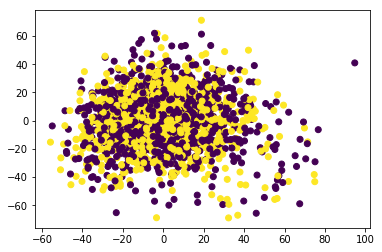

In [22]:
from sklearn.decomposition import PCA

%matplotlib inline
import matplotlib.pyplot as plt

proj = PCA(n_components = 2)
X_proj = proj.fit_transform(X_feat)

plt.scatter(X_proj[:, 0], X_proj[:, 1], c = tr0['Bound'].as_matrix())